# Adult Income
---

Basandonos en la informacion adjunta al dataset el objetivo del problema es clasificar en base a dos clases si una persona gana mas, o menos de $50000 dolares al año, en base a un conjunto de atributos.

# Preparación de los datos
---
Los datos que vamos a recuperar ya fueron previamente procesados, es decir se hicieron analisis de datos faltantes, outliers y normalización

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Recuperamos el dataset
ds=pd.read_csv("../data/adult_cleaning.data")

#Eliminamos la columna que nos agrega pandas al escribir el archivo.
ds=ds.drop(['Unnamed: 0'],axis=1)

#Revisamos los headers de nuestro dataset
ds.head()

,AGE,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,MARITAL-STATUS_ Married-AF-spouse,MARITAL-STATUS_ Married-civ-spouse,MARITAL-STATUS_ Married-spouse-absent,MARITAL-STATUS_ Never-married,MARITAL-STATUS_ Separated,...,NATIVE-COUNTRY_ Puerto-Rico,NATIVE-COUNTRY_ Scotland,NATIVE-COUNTRY_ South,NATIVE-COUNTRY_ Taiwan,NATIVE-COUNTRY_ Thailand,NATIVE-COUNTRY_ Trinadad&Tobago,NATIVE-COUNTRY_ United-States,NATIVE-COUNTRY_ Vietnam,NATIVE-COUNTRY_ Yugoslavia,CLASS
0,0.66,0.923077,0.0,0.0,0.179104,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.42,0.615385,0.0,0.0,0.582090,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.72,0.461538,0.0,0.0,0.582090,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.22,0.923077,0.0,0.0,0.582090,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,1.000000,0.0,0.0,0.582090,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
#Revisamos los tipos de datos del dataset
ds.dtypes

AGE                                           float64
EDUCATION-NUM                                 float64
CAPITAL-GAIN                                  float64
CAPITAL-LOSS                                  float64
HOURS-PER-WEEK                                float64
MARITAL-STATUS_ Married-AF-spouse             float64
MARITAL-STATUS_ Married-civ-spouse            float64
MARITAL-STATUS_ Married-spouse-absent         float64
MARITAL-STATUS_ Never-married                 float64
MARITAL-STATUS_ Separated                     float64
MARITAL-STATUS_ Widowed                       float64
RELATIONSHIP_ Not-in-family                   float64
RELATIONSHIP_ Other-relative                  float64
RELATIONSHIP_ Own-child                       float64
RELATIONSHIP_ Unmarried                       float64
RELATIONSHIP_ Wife                            float64
RACE_ Asian-Pac-Islander                      float64
RACE_ Black                                   float64
RACE_ Other                 

In [25]:
#Obtenemos las medidas estadisticas del dataset
ds.describe()

,AGE,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,MARITAL-STATUS_ Married-AF-spouse,MARITAL-STATUS_ Married-civ-spouse,MARITAL-STATUS_ Married-spouse-absent,MARITAL-STATUS_ Never-married,MARITAL-STATUS_ Separated,...,NATIVE-COUNTRY_ Puerto-Rico,NATIVE-COUNTRY_ Scotland,NATIVE-COUNTRY_ South,NATIVE-COUNTRY_ Taiwan,NATIVE-COUNTRY_ Thailand,NATIVE-COUNTRY_ Trinadad&Tobago,NATIVE-COUNTRY_ United-States,NATIVE-COUNTRY_ Vietnam,NATIVE-COUNTRY_ Yugoslavia,CLASS
count,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,...,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000,27034.000000
mean,0.404439,0.686366,0.024770,0.022125,0.580524,0.000703,0.442406,0.012651,0.343234,0.032404,...,0.003810,0.000407,0.002182,0.001036,0.000481,0.000629,0.911556,0.002182,0.000592,0.212066
std,0.244796,0.182514,0.107011,0.139352,0.151104,0.026502,0.496681,0.111764,0.474798,0.177073,...,0.061609,0.020168,0.046666,0.032167,0.021924,0.025069,0.283945,0.046666,0.024321,0.408779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.615385,0.000000,0.000000,0.582090,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.380000,0.692308,0.000000,0.000000,0.582090,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.580000,0.846154,0.000000,0.000000,0.656716,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Revisamos si hay algun dato faltante
ds.isna().sum()

AGE                                           0
EDUCATION-NUM                                 0
CAPITAL-GAIN                                  0
CAPITAL-LOSS                                  0
HOURS-PER-WEEK                                0
MARITAL-STATUS_ Married-AF-spouse             0
MARITAL-STATUS_ Married-civ-spouse            0
MARITAL-STATUS_ Married-spouse-absent         0
MARITAL-STATUS_ Never-married                 0
MARITAL-STATUS_ Separated                     0
MARITAL-STATUS_ Widowed                       0
RELATIONSHIP_ Not-in-family                   0
RELATIONSHIP_ Other-relative                  0
RELATIONSHIP_ Own-child                       0
RELATIONSHIP_ Unmarried                       0
RELATIONSHIP_ Wife                            0
RACE_ Asian-Pac-Islander                      0
RACE_ Black                                   0
RACE_ Other                                   0
RACE_ White                                   0
SEX_ Male                               

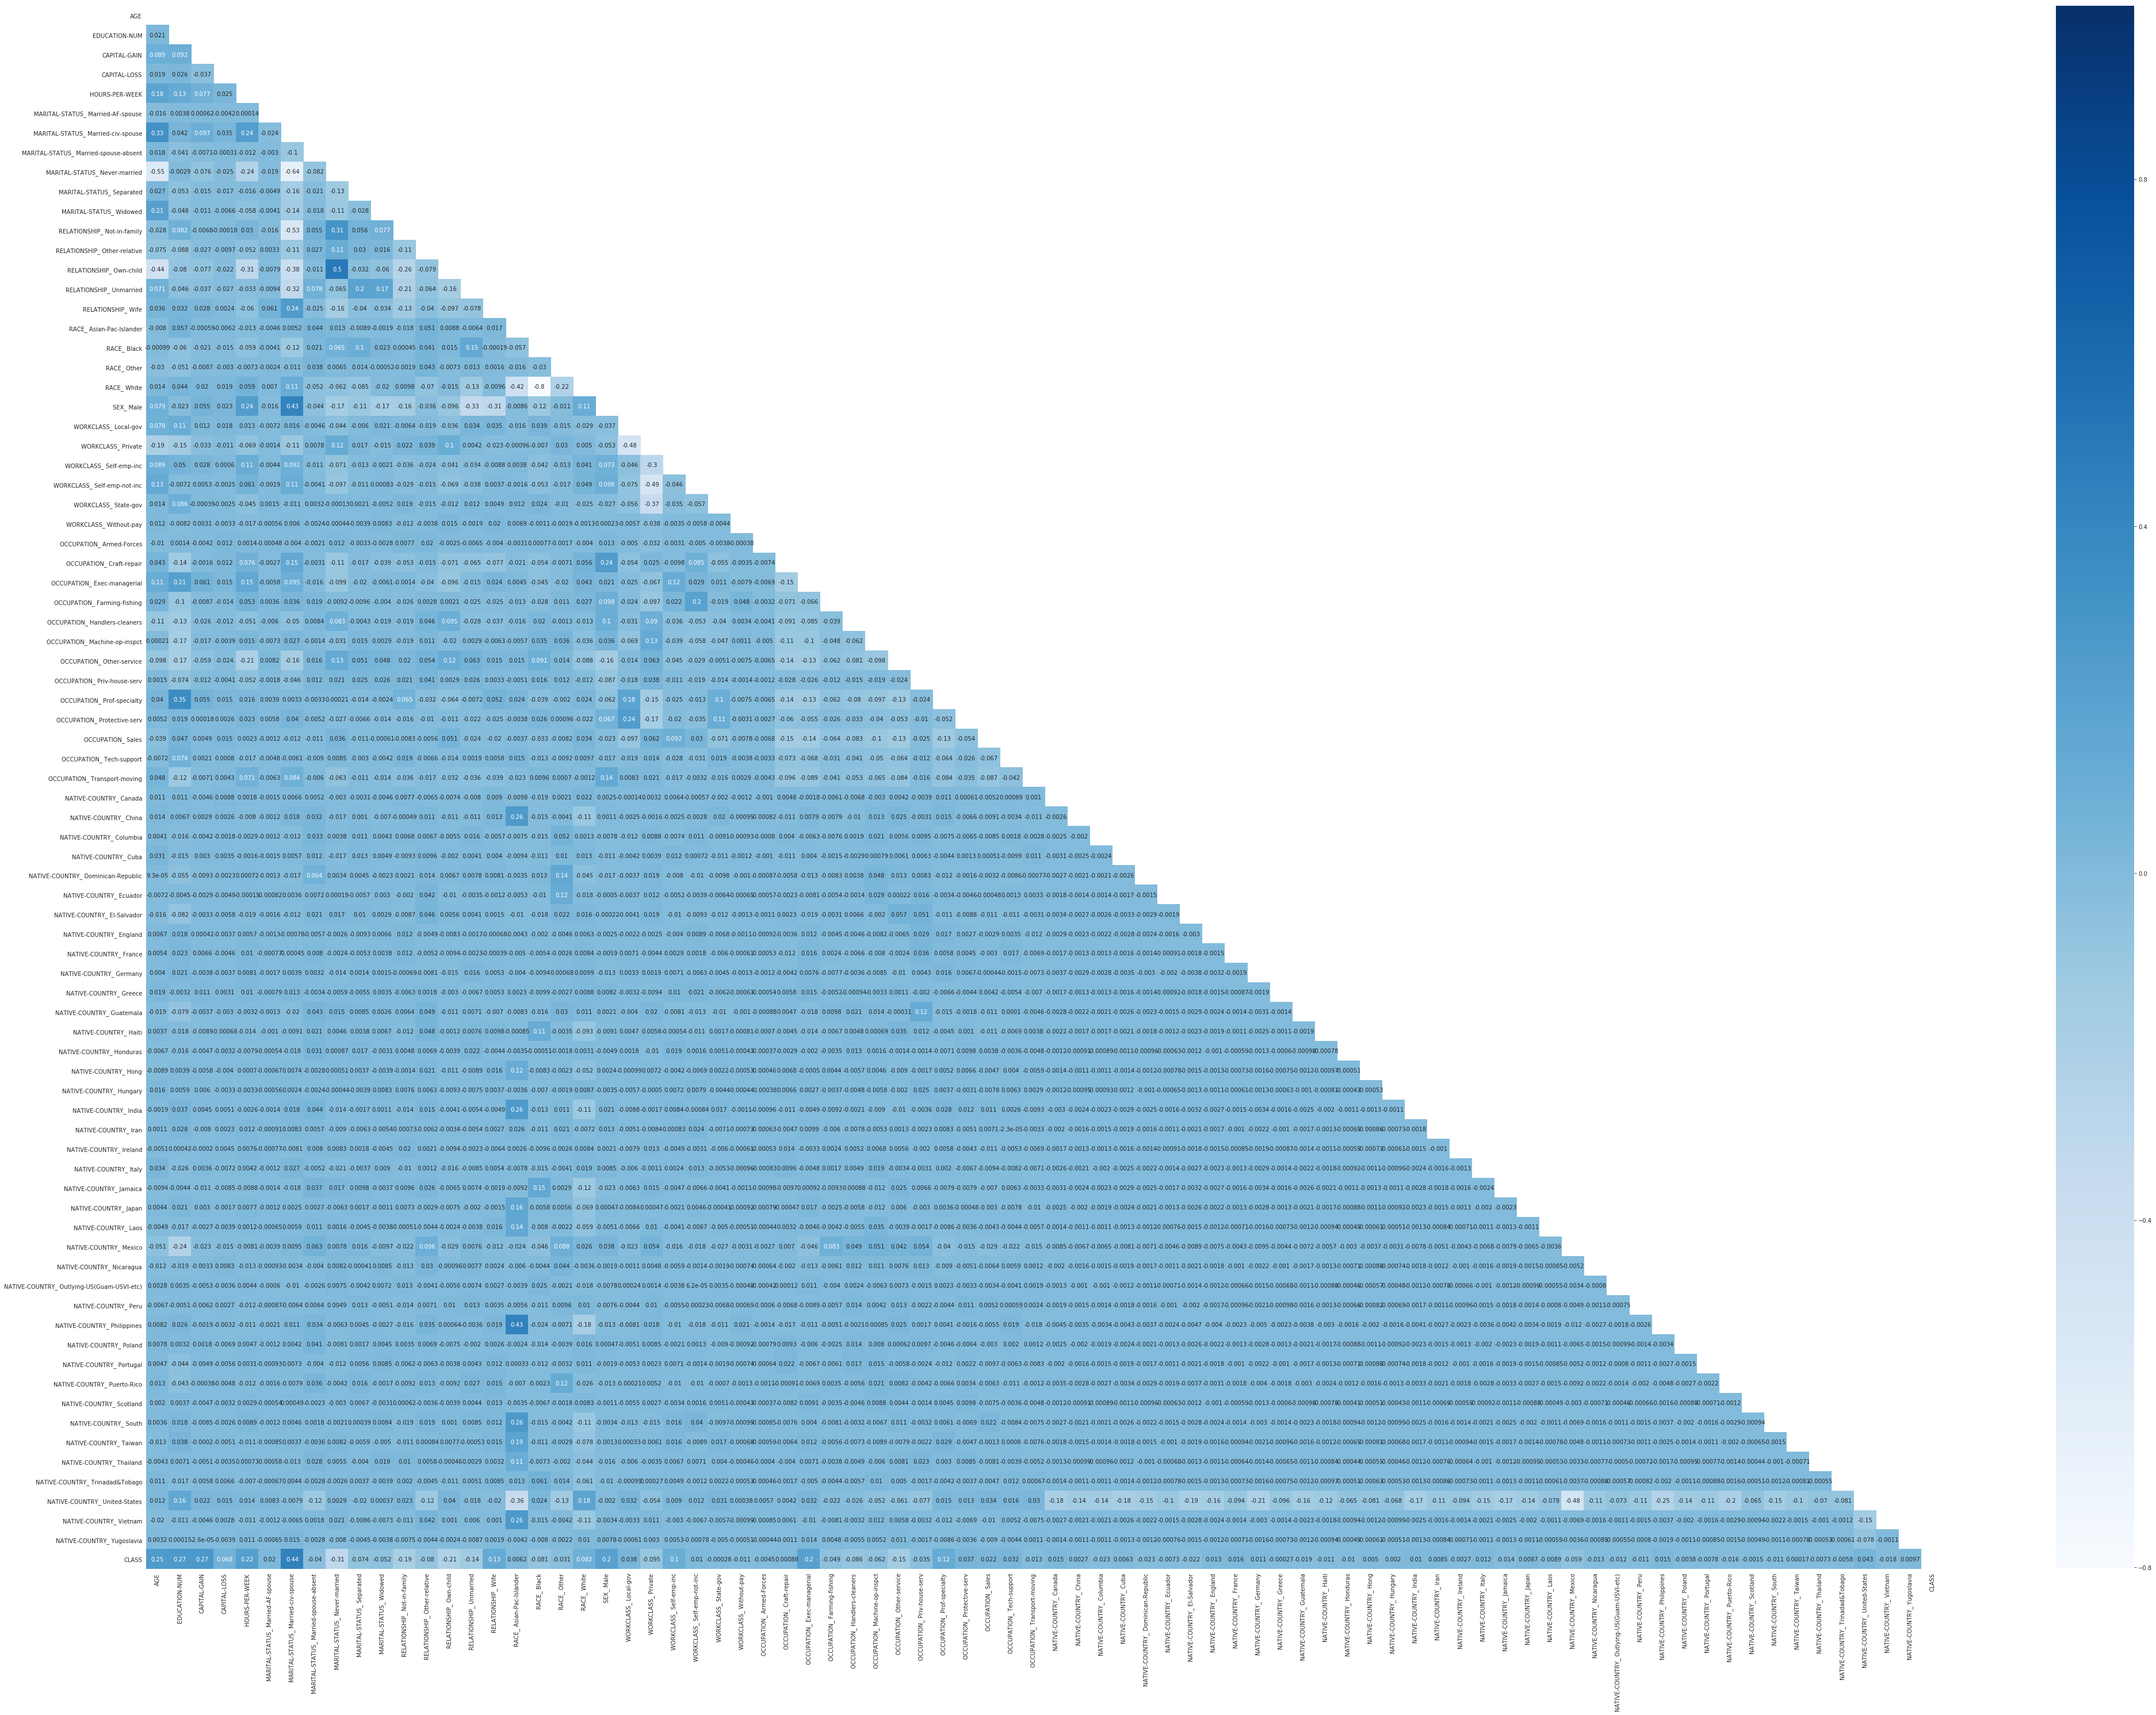

In [32]:
#Creamos una función para imprimir la matriz de correlacion.
def printCorrelationMatrix(dataset):
    correlation=ds.corr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(70,50))
    with sns.axes_style("white"):
        ax = sns.heatmap(correlation, mask=mask,cmap="Blues",annot=True)
        
printCorrelationMatrix(ds)

# Entrenamiento del Modelo de Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

#Quito la variable de prediccion
X= np.array(ds.drop(['CLASS'],1))

#Me quedo con la variable de prediccion
Y = np.array(ds['CLASS'])

#Ajusto el tamaño de los datos para test
validation_size = 0.30
#Utilizo una semilla para poder reproducir el split
seed = 2018

#Hago un split para validar el modelo
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)

#Defino el KFold
kfold = model_selection.KFold(n_splits=10, random_state=seed)

trainingResults=[]
print("\n-----------------------------------------------------\n")
print("Resultado Training\n")
for forest in range(300,1500,300):
    print("\tDensidad del bosque: %s\n" % forest)
    for depth in range(3,6):
        print("\t\tProfunidad de los árboles: %s\n" % depth)
       
        #Creo el modelo de RandomForest con un bosque de 1000 árboles, cada uno con una profundidad de entre 2 y 5 
        model = RandomForestClassifier(n_estimators=forest, max_depth=depth)

        #Obtengo los resultados del entrenamiento 
        results = model_selection.cross_val_score(model, X_train,Y_train, cv=kfold, scoring='accuracy')
        
        print("\t\t\tMedia: %f" % (results.mean()))
        print("\t\t\tDesvio Estandar: %f\n" % (results.std()))
        print("\t\t---------------------------------------")
    print("\t==================================================")



-----------------------------------------------------

Resultado Training

	Densidad del bosque: 300

		Profunidad de los árboles: 3

			Media: 0.796913
			Desvio Estandar: 0.011181

		---------------------------------------
		Profunidad de los árboles: 4

			Media: 0.806531
			Desvio Estandar: 0.009974

		---------------------------------------
		Profunidad de los árboles: 5

			Media: 0.823125
			Desvio Estandar: 0.009438

		---------------------------------------
	Densidad del bosque: 600

		Profunidad de los árboles: 3

			Media: 0.796437
			Desvio Estandar: 0.011312

		---------------------------------------
		Profunidad de los árboles: 4

			Media: 0.807376
			Desvio Estandar: 0.010635

		---------------------------------------
		Profunidad de los árboles: 5

			Media: 0.822596
			Desvio Estandar: 0.008877

		---------------------------------------
	Densidad del bosque: 900

		Profunidad de los árboles: 3

			Media: 0.795169
			Desvio Estandar: 0.010618

		----------------------

# Validación del modelo

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Vamos a utilizar una profundidad de 5 y un bosque de 300
model=RandomForestClassifier(n_estimators=300, max_depth=5)

#Ajusto el modelo
model.fit(X_train,Y_train)

#Hago las predicciones
predictions=model.predict(X_validation)

print("#### Accuracy Validación ####\n")
#Imprimo la el scoring de la validación
print("Accuracy: %s" % accuracy_score(Y_validation, predictions))

#imprimimos otras metricas del model
print(classification_report(Y_validation, predictions))

#### Accuracy Validación ####

Accuracy: 0.8222167426951054
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      6415
         1.0       0.90      0.17      0.28      1696

   micro avg       0.82      0.82      0.82      8111
   macro avg       0.86      0.58      0.59      8111
weighted avg       0.84      0.82      0.77      8111

